<a href="https://colab.research.google.com/github/hargurjeet/Bike_Sharing_Case_Study/blob/main/Bike_Sharing_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bike Rides Sharing Case Study**

The case study/dataset provides the details of shared bike rides taken at a certain time interval. It is required to build a machine learning algorithm to predict the demand of shared bikes.

  # **Table Of Contents**<a name="top"></a>


---



---

  
  1. [About the Dataset](#1)
  2. [Data Understanding](#2)
  3. [Expainatory Data Analysis](#3)
  4. [Data Prepartion](#4)
  5. [Model Building](#5)
  6. [Evaluation on Test set](#6)
  7. [Summary & Conclusion](#7)
  8. [References](#8)

# 1: AboutDataset <a name="1"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

The dataset contains 700+ records providing the details of rides. The features set contains features like weather, tempeature, season, holiday, humidity...etc. The target column provides the demand of bike on the paritcular day.

In [1]:
# !pip install autoviz
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
## Data preprocessing libraries
import pandas as pd
import numpy as np

## Libraries for building visuals
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# libraries for data preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

# Library for auto EDA
# from autoviz.AutoViz_Class import AutoViz_Class

# Libraries for building ML models
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
file_path = r'https://raw.githubusercontent.com/hargurjeet/Bike_Sharing_Case_Study/main/day.csv'
br = pd.read_csv(file_path)
br.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# 2: Data Understanding <a name="2"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

In [4]:
br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


**Key observation** - 
- No nul values within the dataset.
- Categorical columns are currently represented an int64.
- instant and dteday seems to be unrelevant for machine learning model.

In [5]:
br.shape

(730, 16)

In [6]:
br.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# 3: Expalinatory Data Analysis <a name="3"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

In [7]:
## since instant holds the index values, let get rid of it
## also getting rid of dteday column
br = br.drop(['instant','dteday'], axis=1)

In [8]:
# Modifing the data as per the data dictornary
# The data dictonary is avaliable at this location - https://tinyurl.com/msrvms35
 
# Modifing the season column
br.loc[(br['season'] == 1) , 'season'] = 'spring'

br.loc[(br['season'] == 2) , 'season'] = 'summer'

br.loc[(br['season'] == 3) , 'season'] = 'fall'

br.loc[(br['season'] == 4) , 'season'] = 'winter'

# Modifing the month column
br.mnth = br.mnth.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})

#modifing the weekday column
br.weekday = br.weekday.map({1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'})

# 1-Clear, Few clouds, Partly cloudy, Partly cloudy
br.loc[(br['weathersit'] == 1) , 'weathersit'] = 'Clear/Partly Cloudy'

# 2-Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
br.loc[(br['weathersit'] == 2) , 'weathersit'] = 'Mist'

# 3-Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
br.loc[(br['weathersit'] == 3) , 'weathersit'] = 'Light_snow/Light_rain'

# 4-Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
br.loc[(br['weathersit'] == 4) , 'weathersit'] = 'HeavyRain/Thunderstorm'

# Converting the columns to categories
br.season.astype('category')
br.yr.astype('category')
br.mnth.astype('category')
br.holiday.astype('category')
br.weekday.astype('category')
br.workingday.astype('category')
br.weathersit.astype('category')

0                     Mist
1                     Mist
2      Clear/Partly Cloudy
3      Clear/Partly Cloudy
4      Clear/Partly Cloudy
              ...         
725                   Mist
726                   Mist
727                   Mist
728    Clear/Partly Cloudy
729                   Mist
Name: weathersit, Length: 730, dtype: category
Categories (3, object): ['Clear/Partly Cloudy', 'Light_snow/Light_rain', 'Mist']

In [9]:
## Checking the data types are modified
br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 80.0+ KB


In [10]:
# Accessing some sample records to confirm the above transformation
br.sample(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
674,winter,1,Nov,0,Thurs,1,Clear/Partly Cloudy,11.514153,14.07835,56.7083,11.625371,466,5220,5686
288,winter,0,Oct,0,Tues,0,Clear/Partly Cloudy,20.978347,25.15770,48.6667,18.875039,1748,3293,5041
278,winter,0,Oct,0,Sat,1,Clear/Partly Cloudy,20.260847,24.02125,62.0833,9.041918,639,4126,4765


In [11]:
# Using the below code EDA can be performed using Auto EDA libraries, I am commenting the code block for now
# AV= AutoViz_Class()

# filename = "https://raw.githubusercontent.com/hargurjeet/Bike_Sharing_Case_Study/main/day.csv"

# dft = AV.AutoViz(
#     filename
# )

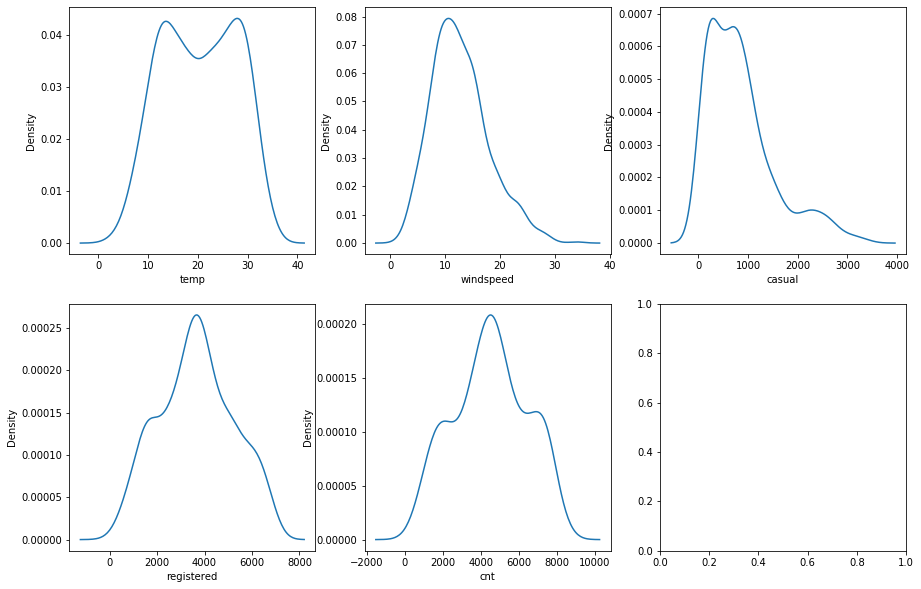

In [12]:
## Understanding the distribution of continous features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

#create chart in each subplot continous variable
sns.kdeplot(br.temp, ax=axes[0,0])

sns.kdeplot(br.windspeed, ax=axes[0,1])

sns.kdeplot(br.casual, ax=axes[0,2])

sns.kdeplot(br.registered, ax=axes[1,0])

sns.kdeplot(br.cnt, ax=axes[1,1])

plt.show()

**Key Observation**
- temp has 2 peaks, this show the data is present in clusters.
- windspeed and casual are left skewed.
- registered user and cnt seems to have normal distirbutions.

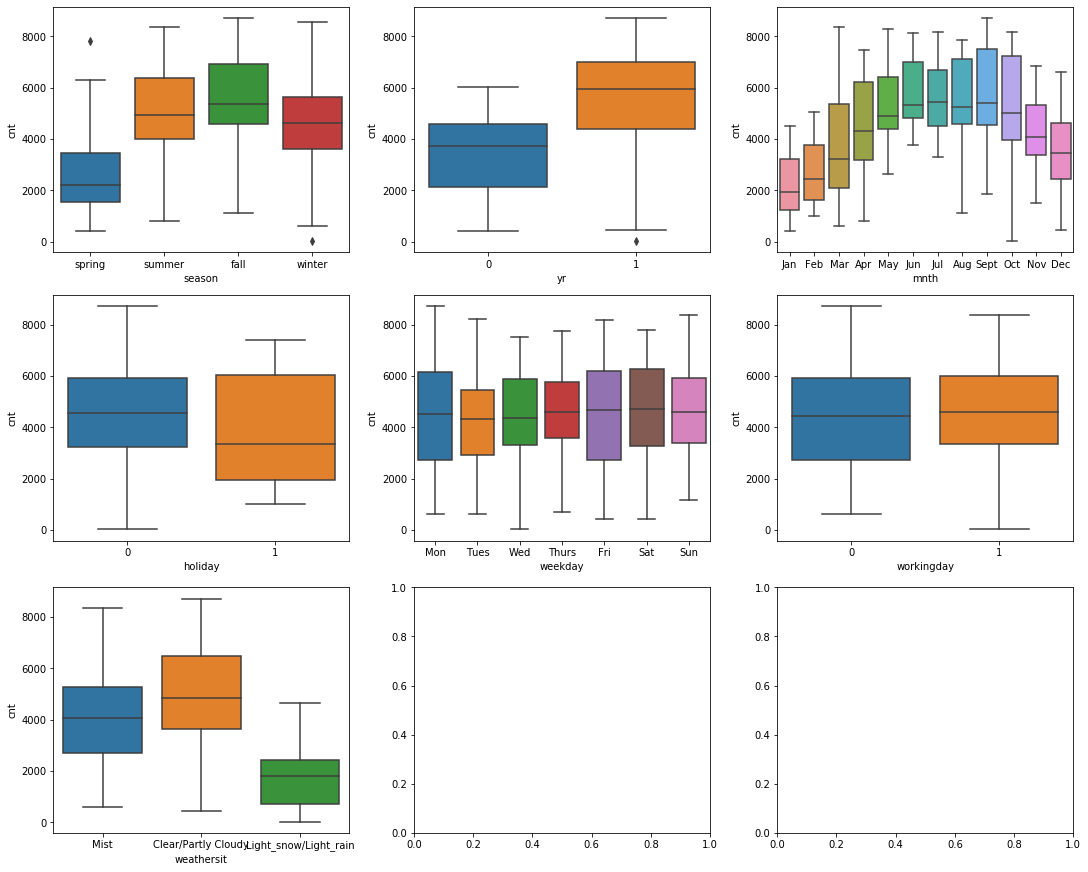

In [13]:
# understanding the categorical features
fig, axes = plt.subplots(3, 3, figsize=(15, 12), constrained_layout=True)

sns.boxplot(y=br.cnt, x=br.season, data=br, ax=axes[0,0])

sns.boxplot(y=br.cnt, x=br.yr, data=br, ax=axes[0,1])

sns.boxplot(y=br.cnt, x=br.mnth, data=br, ax=axes[0,2])

sns.boxplot(y=br.cnt, x=br.holiday, data=br, ax=axes[1,0])

sns.boxplot(y=br.cnt, x=br.weekday, data=br, ax=axes[1,1])

sns.boxplot(y=br.cnt, x=br.workingday, data=br, ax=axes[1,2])

sns.boxplot(y=br.cnt, x=br.weathersit, data=br, ax=axes[2,0])

plt.show()

**Key Observations**
- The rides seems to be on the higher side on summer and fall. This is also emphasized by monthly data which shows high rides demand from the month of April till oct.
- The ride demand is seems to be consistent on working days and on holiday. Similar infomation is dispalyed by the weekday feature which provide the info that the rides demand are consistent across all weekdays.
- The ride sharing is picking the trend and it is observed the demand is increasing year on year.
- The demand of rides are higher on clear day than those days with thunderstom and cloudy weather.

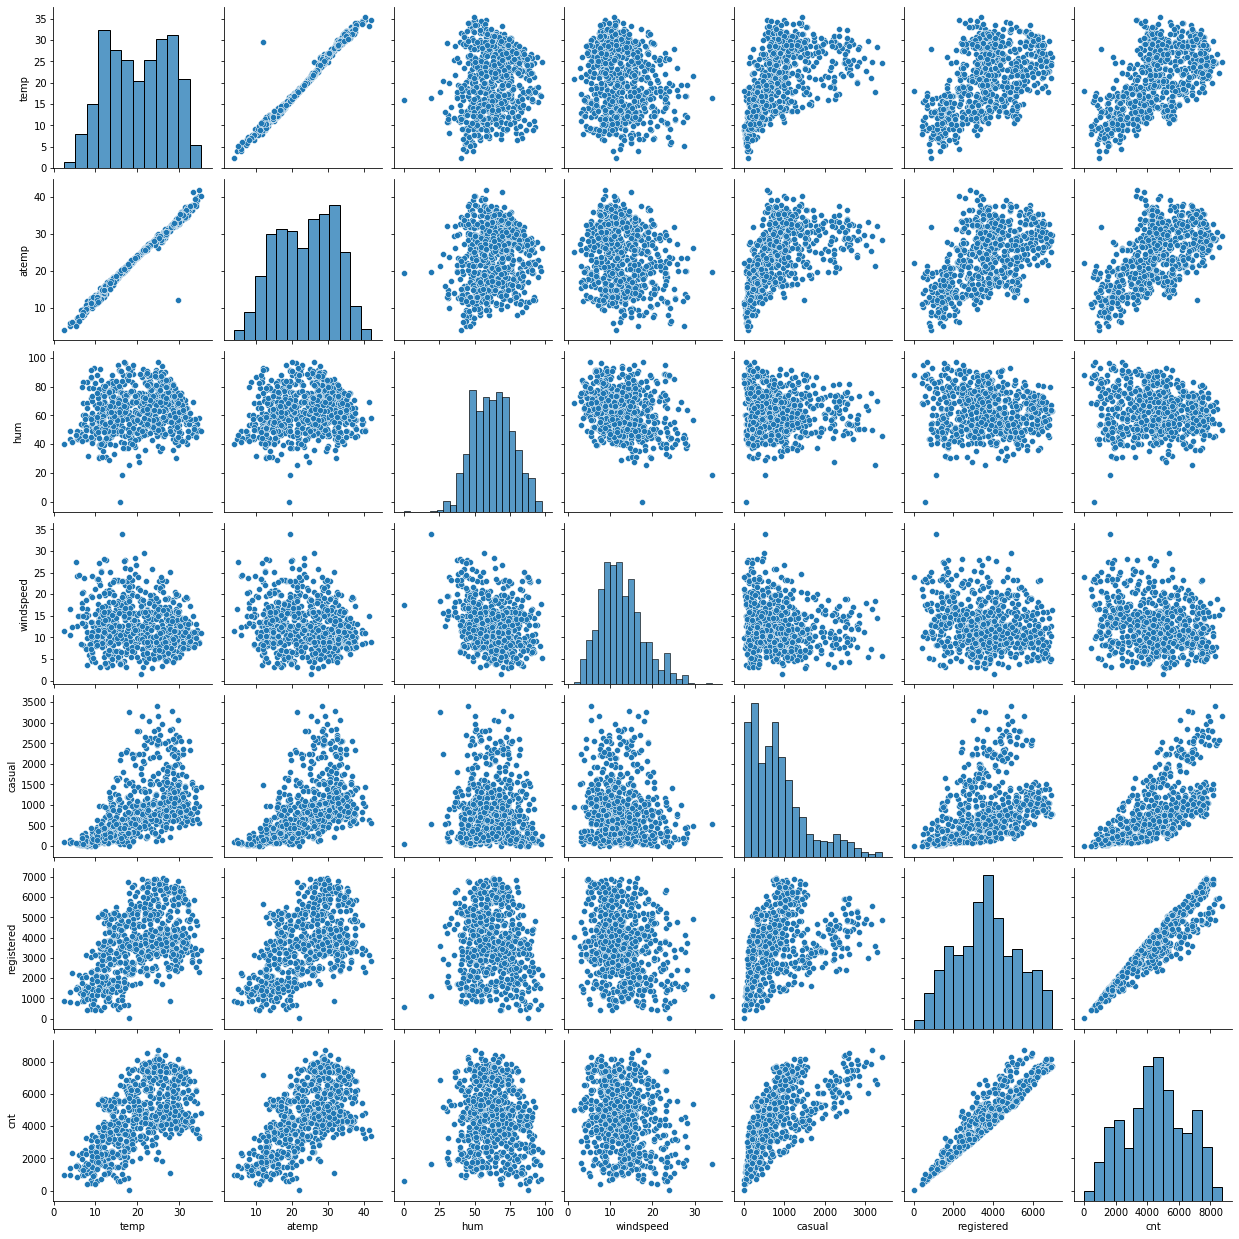

In [14]:
# pair plot for numberical variables
numberic_features=['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

sns.pairplot(br[numberic_features])
plt.show()

Displaying the above relationships in numbers

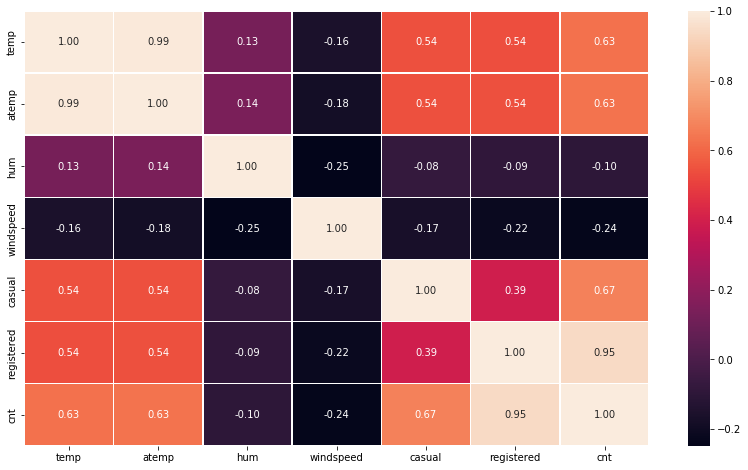

In [15]:
plt.figure(figsize=(14,8))
sns.heatmap(br[numberic_features].corr(), annot=True, linewidth=.5, fmt=".2f")
plt.show()

Following are the observations
1. 'cnt' hightly co related with registered and casual.
2. temp and atemp are equally co realted with cnt
3. hum, windspeed are negitively co realted which mean the there are low riders when there is high speed wind or the temp is highly humid.

Following conclusion are drawn
1. drop atemp as its imformation is represented by temp.
2. As registered and casual adds up to cnt hence dropping these column as well.


In [16]:
br = br.drop(['atemp','casual','registered'], axis=1)
br.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

# 4: Data Prepartion <a name="4"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

In [17]:
br.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,0,Mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tues,0,Mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thurs,1,Clear/Partly Cloudy,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear/Partly Cloudy,9.305237,43.6957,12.522300,1600


### 4.1 Encoding the categorical variables

In [18]:
# cat variables require endocding
cat_variables=['season', 'yr','mnth', 'holiday', 'weekday','workingday', 'weathersit' ]

In [19]:
# implementing one hot encoding to the categorical variables
transformer = make_column_transformer(
    (OneHotEncoder(), cat_variables),
    remainder='passthrough')

transformed = transformer.fit_transform(br)
transformed_df = pd.DataFrame(
    transformed, 
    columns=transformer.get_feature_names_out()
)

In [20]:
transformed_df.columns

Index(['onehotencoder__season_fall', 'onehotencoder__season_spring',
       'onehotencoder__season_summer', 'onehotencoder__season_winter',
       'onehotencoder__yr_0', 'onehotencoder__yr_1', 'onehotencoder__mnth_Apr',
       'onehotencoder__mnth_Aug', 'onehotencoder__mnth_Dec',
       'onehotencoder__mnth_Feb', 'onehotencoder__mnth_Jan',
       'onehotencoder__mnth_Jul', 'onehotencoder__mnth_Jun',
       'onehotencoder__mnth_Mar', 'onehotencoder__mnth_May',
       'onehotencoder__mnth_Nov', 'onehotencoder__mnth_Oct',
       'onehotencoder__mnth_Sept', 'onehotencoder__holiday_0',
       'onehotencoder__holiday_1', 'onehotencoder__weekday_Fri',
       'onehotencoder__weekday_Mon', 'onehotencoder__weekday_Sat',
       'onehotencoder__weekday_Sun', 'onehotencoder__weekday_Thurs',
       'onehotencoder__weekday_Tues', 'onehotencoder__weekday_Wed',
       'onehotencoder__workingday_0', 'onehotencoder__workingday_1',
       'onehotencoder__weathersit_Clear/Partly Cloudy',
       'onehotenco

In [21]:
transformed_df.head()

,onehotencoder__season_fall,onehotencoder__season_spring,onehotencoder__season_summer,onehotencoder__season_winter,onehotencoder__yr_0,onehotencoder__yr_1,onehotencoder__mnth_Apr,onehotencoder__mnth_Aug,onehotencoder__mnth_Dec,onehotencoder__mnth_Feb,...,onehotencoder__weekday_Wed,onehotencoder__workingday_0,onehotencoder__workingday_1,onehotencoder__weathersit_Clear/Partly Cloudy,onehotencoder__weathersit_Light_snow/Light_rain,onehotencoder__weathersit_Mist,remainder__temp,remainder__hum,remainder__windspeed,remainder__cnt
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,14.110847,80.5833,10.749882,985.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,14.902598,69.6087,16.652113,801.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,8.050924,43.7273,16.636703,1349.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,8.200000,59.0435,10.739832,1562.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,9.305237,43.6957,12.522300,1600.0


### 4.2 Performing the train test split

In [22]:
# dropping target column
# Also dropping casual and registered as both adds upto cnt
X = transformed_df.drop(['remainder__cnt'], axis=1)
y = transformed_df.remainder__cnt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [23]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(730, 35)
(511, 35)
(219, 35)


### 4.3 Scaling the numberical features

As this distribution is not close to normal or gaussian distribution hence choosing min max scaler for scaling

In [24]:
numberic_variable = ['remainder__temp', 'remainder__hum',
       'remainder__windspeed']
# X_train[features]

scaler = MinMaxScaler()
X_train[numberic_variable] = scaler.fit_transform(X_train[numberic_variable])
X_train[numberic_variable].head()

,remainder__temp,remainder__hum,remainder__windspeed
683,0.327133,0.639330,0.327101
645,0.403972,0.731215,0.419004
163,0.717562,0.509660,0.708724
360,0.331287,0.785745,0.415925
640,0.745598,0.817947,0.110593


In [25]:
X_train.head()

,onehotencoder__season_fall,onehotencoder__season_spring,onehotencoder__season_summer,onehotencoder__season_winter,onehotencoder__yr_0,onehotencoder__yr_1,onehotencoder__mnth_Apr,onehotencoder__mnth_Aug,onehotencoder__mnth_Dec,onehotencoder__mnth_Feb,...,onehotencoder__weekday_Tues,onehotencoder__weekday_Wed,onehotencoder__workingday_0,onehotencoder__workingday_1,onehotencoder__weathersit_Clear/Partly Cloudy,onehotencoder__weathersit_Light_snow/Light_rain,onehotencoder__weathersit_Mist,remainder__temp,remainder__hum,remainder__windspeed
683,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.327133,0.639330,0.327101
645,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.403972,0.731215,0.419004
163,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.717562,0.509660,0.708724
360,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.331287,0.785745,0.415925
640,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.745598,0.817947,0.110593


In [26]:
X_train.columns

Index(['onehotencoder__season_fall', 'onehotencoder__season_spring',
       'onehotencoder__season_summer', 'onehotencoder__season_winter',
       'onehotencoder__yr_0', 'onehotencoder__yr_1', 'onehotencoder__mnth_Apr',
       'onehotencoder__mnth_Aug', 'onehotencoder__mnth_Dec',
       'onehotencoder__mnth_Feb', 'onehotencoder__mnth_Jan',
       'onehotencoder__mnth_Jul', 'onehotencoder__mnth_Jun',
       'onehotencoder__mnth_Mar', 'onehotencoder__mnth_May',
       'onehotencoder__mnth_Nov', 'onehotencoder__mnth_Oct',
       'onehotencoder__mnth_Sept', 'onehotencoder__holiday_0',
       'onehotencoder__holiday_1', 'onehotencoder__weekday_Fri',
       'onehotencoder__weekday_Mon', 'onehotencoder__weekday_Sat',
       'onehotencoder__weekday_Sun', 'onehotencoder__weekday_Thurs',
       'onehotencoder__weekday_Tues', 'onehotencoder__weekday_Wed',
       'onehotencoder__workingday_0', 'onehotencoder__workingday_1',
       'onehotencoder__weathersit_Clear/Partly Cloudy',
       'onehotenco

# 5: Building ML Model <a name="5"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

### 5.1 Iteration 1

#### 5.1.1 Feature Reduction using stats model

In [27]:
# build the model with all variables
X_train_sm = sm.add_constant(X_train)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model=lr.fit()

#params
lr_model.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         remainder__cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     99.56
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          2.77e-178
Time:                        14:46:39   Log-Likelihood:                -4111.9
No. Observations:                 511   AIC:                             8280.
Df Residuals:                     483   BIC:                             8398.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                             874.0103    103.515      8.443      0.000     670.614    1077.406
onehotencoder__season_fall                        340.0979    152.005      2.237      0.026      41.425     638.771
onehotencoder__season_spring                     -884.5013    153.306     -5.770      0.000   -1185.730    -583.273
onehotencoder__season_summer                      442.5831    151.541      2.921      0.004     144.823     740.343
onehotencoder__season_winter                      975.8306    149.975      6.507      0.000     681.147    1270.514
onehotencoder__yr_0                              -538.4317     63.889     -8.428      0.000    -663.967    -412.896
onehotencoder__yr_1                              1412.4420     61.501     22.966      0.000    1291.599    1533.285
onehotencoder__mnth_Apr                            18.8538    188.199      0.100      0.920    -350.937     388.644
onehotencoder__mnth_Aug                          -100.7551    207.648     -0.485      0.628    -508.759     307.249
onehotencoder__mnth_Dec                          -270.8362    177.433     -1.526      0.128    -619.472      77.800
onehotencoder__mnth_Feb                           182.5657    207.277      0.881      0.379    -224.710     589.842
onehotencoder__mnth_Jan                            48.9122    215.420      0.227      0.820    -374.364     472.189
onehotencoder__mnth_Jul                          -357.9711    212.760     -1.683      0.093    -776.020      60.078
onehotencoder__mnth_Jun                           -11.7739    185.763     -0.063      0.949    -376.777     353.230
onehotencoder__mnth_Mar                           501.0423    165.243      3.032      0.003     176.359     825.725
onehotencoder__mnth_May                           267.7102    193.739      1.382      0.168    -112.964     648.385
onehotencoder__mnth_Nov                          -379.6360    196.798     -1.929      0.054    -766.322       7.050
onehotencoder__mnth_Oct                           352.5366    186.734      1.888      0.060     -14.375     719.448
onehotencoder__mnth_Sept                          623.3617    161.272      3.865      0.000     306.481     940.242
onehotencoder__holiday_0                          707.1423     92.247      7.666      0.000     525.888     888.397
onehotencoder__holiday_1                          166.8680    110.922      1.504      0.133     -51.082     384.818
onehotencoder__weekday_Fri                        149.6550     89.700      1.668      0.096     -26.595     325.905
onehotencoder__weekday_Mon                        304.4901     72.844      4.180      0.000     161.360     447.621
onehotencoder__weekday_Sat                        182.4021     86.0

#### 5.1.2 VIF calculations

In [28]:
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,VIF
0,onehotencoder__season_fall,inf
1,onehotencoder__season_spring,inf
31,onehotencoder__weathersit_Mist,inf
30,onehotencoder__weathersit_Light_snow/Light_rain,inf
29,onehotencoder__weathersit_Clear/Partly Cloudy,inf
28,onehotencoder__workingday_1,inf
27,onehotencoder__workingday_0,inf
26,onehotencoder__weekday_Wed,inf
25,onehotencoder__weekday_Tues,inf
24,onehotencoder__weekday_Thurs,inf


In [29]:
## identifying the varibles having high p values and VIF
X = X_train.drop('onehotencoder__weekday_Thurs', axis=1)

### 5.2 Iteration 2

#### 5.2.1 Feature Reduction using stats model

In [30]:
X_train_sm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model=lr.fit()

#params
lr_model.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         remainder__cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     99.56
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          2.77e-178
Time:                        14:46:39   Log-Likelihood:                -4111.9
No. Observations:                 511   AIC:                             8280.
Df Residuals:                     483   BIC:                             8398.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                             874.4686    115.711      7.557      0.000     647.109    1101.829
onehotencoder__season_fall                        340.2125    152.593      2.230      0.026      40.384     640.041
onehotencoder__season_spring                     -884.3867    153.649     -5.756      0.000   -1186.289    -582.484
onehotencoder__season_summer                      442.6976    151.951      2.913      0.004     144.130     741.265
onehotencoder__season_winter                      975.9452    150.837      6.470      0.000     679.568    1272.323
onehotencoder__yr_0                              -538.2025     68.781     -7.825      0.000    -673.350    -403.055
onehotencoder__yr_1                              1412.6712     66.860     21.129      0.000    1281.299    1544.043
onehotencoder__mnth_Apr                            18.8920    188.324      0.100      0.920    -351.144     388.928
onehotencoder__mnth_Aug                          -100.7169    207.906     -0.484      0.628    -509.228     307.794
onehotencoder__mnth_Dec                          -270.7980    177.307     -1.527      0.127    -619.186      77.590
onehotencoder__mnth_Feb                           182.6039    207.220      0.881      0.379    -224.560     589.768
onehotencoder__mnth_Jan                            48.9504    215.332      0.227      0.820    -374.153     472.054
onehotencoder__mnth_Jul                          -357.9329    212.914     -1.681      0.093    -776.285      60.419
onehotencoder__mnth_Jun                           -11.7357    185.961     -0.063      0.950    -377.128     353.657
onehotencoder__mnth_Mar                           501.0805    165.238      3.032      0.003     176.406     825.755
onehotencoder__mnth_May                           267.7484    193.856      1.381      0.168    -113.156     648.653
onehotencoder__mnth_Nov                          -379.5978    196.666     -1.930      0.054    -766.025       6.829
onehotencoder__mnth_Oct                           352.5748    186.702      1.888      0.060     -14.274     719.424
onehotencoder__mnth_Sept                          623.3999    161.443      3.861      0.000     306.183     940.617
onehotencoder__holiday_0                          706.8877     94.631      7.470      0.000     520.949     892.827
onehotencoder__holiday_1                          167.5809    133.081      1.259      0.209     -93.907     429.069
onehotencoder__weekday_Fri                        148.2037    132.856      1.116      0.265    -112.843     409.251
onehotencoder__weekday_Mon                        304.0064     82.152      3.701      0.000     142.586     465.427
onehotencoder__weekday_Sat                        180.9508    132.6

#### 5.2.2 VIF calucations

In [31]:
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,VIF
0,onehotencoder__season_fall,inf
1,onehotencoder__season_spring,inf
31,onehotencoder__weathersit_Mist,inf
30,onehotencoder__weathersit_Light_snow/Light_rain,inf
29,onehotencoder__weathersit_Clear/Partly Cloudy,inf
28,onehotencoder__workingday_1,inf
27,onehotencoder__workingday_0,inf
26,onehotencoder__weekday_Wed,inf
25,onehotencoder__weekday_Tues,inf
24,onehotencoder__weekday_Thurs,inf


### 5.3 Iteration 3

#### 5.3.1 Feature Reduction using stats model

In [32]:
# Dropping the column did not affected the VIF 
# dropping all the column having the p-value greater than 0.05
X = X.drop(['onehotencoder__mnth_Apr', 'onehotencoder__mnth_Aug','onehotencoder__mnth_Dec','onehotencoder__mnth_Feb', \
            'onehotencoder__mnth_Jan','onehotencoder__mnth_Jul','onehotencoder__mnth_Jun','onehotencoder__mnth_May', \
            'onehotencoder__mnth_Oct','onehotencoder__weekday_Fri','onehotencoder__weekday_Sat','onehotencoder__weekday_Sun', \
            'onehotencoder__weekday_Tues','onehotencoder__weekday_Wed','onehotencoder__holiday_1'], axis=1)

# Building the model
X_train_sm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model=lr.fit()

#params
lr_model.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         remainder__cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     173.0
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          1.03e-185
Time:                        14:46:39   Log-Likelihood:                -4124.8
No. Observations:                 511   AIC:                             8282.
Df Residuals:                     495   BIC:                             8349.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                             978.2611    148.581      6.584      0.000     686.333    1270.189
onehotencoder__season_fall                        126.0308    114.905      1.097      0.273     -99.731     351.793
onehotencoder__season_spring                     -786.5379     98.541     -7.982      0.000    -980.148    -592.928
onehotencoder__season_summer                      541.9856     79.722      6.798      0.000     385.350     698.622
onehotencoder__season_winter                     1096.7826     84.383     12.998      0.000     930.989    1262.576
onehotencoder__yr_0                              -486.1374     84.582     -5.748      0.000    -652.322    -319.953
onehotencoder__yr_1                              1464.3985     79.949     18.317      0.000    1307.318    1621.479
onehotencoder__mnth_Mar                           434.3240    151.948      2.858      0.004     135.782     732.866
onehotencoder__mnth_Nov                          -467.8021    152.172     -3.074      0.002    -766.785    -168.819
onehotencoder__mnth_Sept                          736.4390    133.677      5.509      0.000     473.795     999.083
onehotencoder__holiday_0                          350.7004    229.732      1.527      0.128    -100.669     802.070
onehotencoder__weekday_Mon                        410.8184    127.182      3.230      0.001     160.936     660.701
onehotencoder__workingday_0                       318.0085     84.873      3.747      0.000     151.253     484.764
onehotencoder__workingday_1                       660.2526     93.803      7.039      0.000     475.952     844.554
onehotencoder__weathersit_Clear/Partly Cloudy    1147.8975     82.850     13.855      0.000     985.117    1310.678
onehotencoder__weathersit_Light_snow/Light_rain  -812.9994    173.122     -4.696      0.000   -1153.144    -472.854
onehotencoder__weathersit_Mist                    643.3630     89.881      7.158      0.000     466.767     819.959
remainder__temp                                  3868.4003    296.864     13.031      0.000    3285.132    4451.669
remainder__hum                                  -1314.3953    330.989     -3.971      0.000   -1964.712    -664.079
remainder__windspeed                             -982.6935    207.067     -4.746      0.000   -1389.532    -575.856
==============================================================================
Omnibus:                       71.262   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.952
Skew:                          -0.800   Prob(JB):                     6.71e-31
Kurtosis:                       4.992   Cond. No.                     1.14e+16
====================

#### 5.3.2 VIF Calculations

In [33]:
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,VIF
0,onehotencoder__season_fall,inf
1,onehotencoder__season_spring,inf
31,onehotencoder__weathersit_Mist,inf
30,onehotencoder__weathersit_Light_snow/Light_rain,inf
29,onehotencoder__weathersit_Clear/Partly Cloudy,inf
28,onehotencoder__workingday_1,inf
27,onehotencoder__workingday_0,inf
26,onehotencoder__weekday_Wed,inf
25,onehotencoder__weekday_Tues,inf
24,onehotencoder__weekday_Thurs,inf


### 5.4 Iterartion 4

#### 5.4.1 Feature Reduction using stats model

In [34]:
# bedroom seems to have high p value
X = X.drop(['onehotencoder__season_fall', 'onehotencoder__holiday_0'], axis=1)

# Building the model
X_train_sm = sm.add_constant(X)

#create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model=lr.fit()

#params
lr_model.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         remainder__cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 14 Dec 2022   Prob (F-statistic):          2.36e-186
Time:                        14:46:39   Log-Likelihood:                -4126.0
No. Observations:                 511   AIC:                             8282.
Df Residuals:                     496   BIC:                             8346.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                            1171.3409    156.157      7.501      0.000     864.530    1478.152
onehotencoder__season_spring                     -925.3319    188.382     -4.912      0.000   -1295.457    -555.207
onehotencoder__season_summer                      412.9640    119.268      3.462      0.001     178.631     647.297
onehotencoder__season_winter                      968.5701    143.745      6.738      0.000     686.147    1250.994
onehotencoder__yr_0                              -388.7722     87.530     -4.442      0.000    -560.748    -216.796
onehotencoder__yr_1                              1560.1131     83.933     18.588      0.000    1395.204    1725.022
onehotencoder__mnth_Mar                           446.6156    151.938      2.939      0.003     148.095     745.136
onehotencoder__mnth_Nov                          -474.8687    152.305     -3.118      0.002    -774.112    -175.625
onehotencoder__mnth_Sept                          735.9137    133.856      5.498      0.000     472.920     998.907
onehotencoder__weekday_Mon                        463.3649    122.599      3.780      0.000     222.487     704.243
onehotencoder__workingday_0                       388.3947     94.582      4.106      0.000     202.563     574.226
onehotencoder__workingday_1                       782.9462     87.382      8.960      0.000     611.262     954.630
onehotencoder__weathersit_Clear/Partly Cloudy    1211.5540     82.965     14.603      0.000    1048.547    1374.561
onehotencoder__weathersit_Light_snow/Light_rain  -748.5915    174.836     -4.282      0.000   -1092.102    -405.081
onehotencoder__weathersit_Mist                    708.3784     91.285      7.760      0.000     529.025     887.732
remainder__temp                                  3864.8719    297.253     13.002      0.000    3280.842    4448.901
remainder__hum                                  -1314.5675    331.433     -3.966      0.000   -1965.752    -663.383
remainder__windspeed                             -967.4458    207.103     -4.671      0.000   -1374.353    -560.539
==============================================================================
Omnibus:                       74.268   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.220
Skew:                          -0.829   Prob(JB):                     2.92e-32
Kurtosis:                       5.018   Cond. No.                     1.57e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.68e-30. This might indicate that there a

#### 5.4.2 VIF Calculations

In [35]:
vif = pd.DataFrame()
vif['features'] = X_train[['remainder__temp', 'remainder__hum', 'remainder__windspeed']].columns
vif['VIF'] = [variance_inflation_factor(X_train[['remainder__temp', 'remainder__hum', 'remainder__windspeed']].values, i) for i in range(X_train[['remainder__temp', 'remainder__hum', 'remainder__windspeed']].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
1,remainder__hum,8.40
0,remainder__temp,6.13
2,remainder__windspeed,4.18


In [63]:
# Final list of relevant features
features_final = ['onehotencoder__season_spring', 'onehotencoder__season_summer',
       'onehotencoder__season_winter', 'onehotencoder__yr_0',
       'onehotencoder__yr_1','onehotencoder__mnth_Mar',
       'onehotencoder__mnth_Nov', 'onehotencoder__mnth_Sept',
       'onehotencoder__weekday_Mon',
       'onehotencoder__workingday_0','onehotencoder__workingday_1',
       'onehotencoder__weathersit_Clear/Partly Cloudy',
       'onehotencoder__weathersit_Light_snow/Light_rain',
       'onehotencoder__weathersit_Mist',  'remainder__temp', 'remainder__hum',
       'remainder__windspeed']


### 5.5 Residual Analysis

In [37]:
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred

683    4823.913523
645    4991.504598
163    4607.682365
360    1193.642028
640    6890.749923
          ...     
71     2154.107459
106    3379.123335
270    5296.016621
435    5098.152376
102    2725.918349
Length: 511, dtype: float64

In [38]:
X_train_sm.shape

(511, 18)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


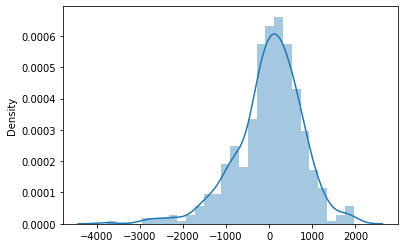

In [39]:
residual = y_train - y_train_pred
sns.distplot(residual)
plt.show()

The error terms are fairly normally distributed and we can surely live with this. Let's now make predictions on the test-set.

# 6: Evaluation on Test set <a name="6"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

### 6.1 Preparing Test data

#### 6.1.1 Scaling

In [40]:
X_test[numberic_variable]

,remainder__temp,remainder__hum,remainder__windspeed
468,20.295000,50.2917,12.791439
148,27.367500,81.8750,14.333846
302,13.085847,62.3750,11.833339
355,17.356653,75.7500,3.167425
515,27.880000,49.2917,13.083693
...,...,...,...
332,18.791653,83.0833,17.292164
532,24.292500,59.8750,9.708568
558,29.998347,48.5833,5.416950
137,22.550000,87.0000,13.499964


In [41]:
X_test[numberic_variable] = scaler.transform(X_test[numberic_variable])
X_test[numberic_variable].head()

,remainder__temp,remainder__hum,remainder__windspeed
468,0.543115,0.518248,0.422104
148,0.758058,0.843709,0.479765
302,0.324018,0.642765,0.386287
355,0.453814,0.780592,0.062325
515,0.773634,0.507943,0.433030


In [42]:
X_test.describe()

,onehotencoder__season_fall,onehotencoder__season_spring,onehotencoder__season_summer,onehotencoder__season_winter,onehotencoder__yr_0,onehotencoder__yr_1,onehotencoder__mnth_Apr,onehotencoder__mnth_Aug,onehotencoder__mnth_Dec,onehotencoder__mnth_Feb,...,onehotencoder__weekday_Tues,onehotencoder__weekday_Wed,onehotencoder__workingday_0,onehotencoder__workingday_1,onehotencoder__weathersit_Clear/Partly Cloudy,onehotencoder__weathersit_Light_snow/Light_rain,onehotencoder__weathersit_Mist,remainder__temp,remainder__hum,remainder__windspeed
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.251142,0.283105,0.237443,0.228311,0.547945,0.452055,0.073059,0.109589,0.109589,0.082192,...,0.123288,0.132420,0.283105,0.716895,0.657534,0.027397,0.315068,0.527468,0.629546,0.435511
std,0.434663,0.451539,0.426491,0.420705,0.498836,0.498836,0.260830,0.313092,0.313092,0.275286,...,0.329520,0.339723,0.451539,0.451539,0.475622,0.163612,0.465607,0.229936,0.152584,0.212750
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047675,0.193646,0.060760
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.324018,0.520479,0.281156
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.507811,0.608416,0.416900
75%,0.500000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.726388,0.735901,0.534288
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.970925,1.002146,1.214955


In [43]:
X_test.columns

Index(['onehotencoder__season_fall', 'onehotencoder__season_spring',
       'onehotencoder__season_summer', 'onehotencoder__season_winter',
       'onehotencoder__yr_0', 'onehotencoder__yr_1', 'onehotencoder__mnth_Apr',
       'onehotencoder__mnth_Aug', 'onehotencoder__mnth_Dec',
       'onehotencoder__mnth_Feb', 'onehotencoder__mnth_Jan',
       'onehotencoder__mnth_Jul', 'onehotencoder__mnth_Jun',
       'onehotencoder__mnth_Mar', 'onehotencoder__mnth_May',
       'onehotencoder__mnth_Nov', 'onehotencoder__mnth_Oct',
       'onehotencoder__mnth_Sept', 'onehotencoder__holiday_0',
       'onehotencoder__holiday_1', 'onehotencoder__weekday_Fri',
       'onehotencoder__weekday_Mon', 'onehotencoder__weekday_Sat',
       'onehotencoder__weekday_Sun', 'onehotencoder__weekday_Thurs',
       'onehotencoder__weekday_Tues', 'onehotencoder__weekday_Wed',
       'onehotencoder__workingday_0', 'onehotencoder__workingday_1',
       'onehotencoder__weathersit_Clear/Partly Cloudy',
       'onehotenco

In [44]:
X_test.shape

(219, 35)

In [64]:
X_test[features_final]

,onehotencoder__season_spring,onehotencoder__season_summer,onehotencoder__season_winter,onehotencoder__yr_0,onehotencoder__yr_1,onehotencoder__mnth_Mar,onehotencoder__mnth_Nov,onehotencoder__mnth_Sept,onehotencoder__weekday_Mon,onehotencoder__workingday_0,onehotencoder__workingday_1,onehotencoder__weathersit_Clear/Partly Cloudy,onehotencoder__weathersit_Light_snow/Light_rain,onehotencoder__weathersit_Mist,remainder__temp,remainder__hum,remainder__windspeed
468,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.543115,0.518248,0.422104
148,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.758058,0.843709,0.479765
302,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.324018,0.642765,0.386287
355,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.453814,0.780592,0.062325
515,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.773634,0.507943,0.433030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.497426,0.856161,0.590357
532,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.664605,0.617003,0.306856
558,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.838014,0.500644,0.146420
137,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.611648,0.896522,0.448592


### 6.2 Model performance on Test set

In [65]:
# add a constanst 
X_test_sm = sm.add_constant(X_test[features_final])

X_test_sm.head()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,onehotencoder__season_spring,onehotencoder__season_summer,onehotencoder__season_winter,onehotencoder__yr_0,onehotencoder__yr_1,onehotencoder__mnth_Mar,onehotencoder__mnth_Nov,onehotencoder__mnth_Sept,onehotencoder__weekday_Mon,onehotencoder__workingday_0,onehotencoder__workingday_1,onehotencoder__weathersit_Clear/Partly Cloudy,onehotencoder__weathersit_Light_snow/Light_rain,onehotencoder__weathersit_Mist,remainder__temp,remainder__hum,remainder__windspeed
468,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.543115,0.518248,0.422104
148,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.758058,0.843709,0.479765
302,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.324018,0.642765,0.386287
355,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.453814,0.780592,0.062325
515,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.773634,0.507943,0.433030


In [53]:
X_test_sm.shape

(219, 36)

In [66]:
X_test_sm.columns

Index(['const', 'onehotencoder__season_spring', 'onehotencoder__season_summer',
       'onehotencoder__season_winter', 'onehotencoder__yr_0',
       'onehotencoder__yr_1', 'onehotencoder__mnth_Mar',
       'onehotencoder__mnth_Nov', 'onehotencoder__mnth_Sept',
       'onehotencoder__weekday_Mon', 'onehotencoder__workingday_0',
       'onehotencoder__workingday_1',
       'onehotencoder__weathersit_Clear/Partly Cloudy',
       'onehotencoder__weathersit_Light_snow/Light_rain',
       'onehotencoder__weathersit_Mist', 'remainder__temp', 'remainder__hum',
       'remainder__windspeed'],
      dtype='object')

In [67]:
X_train_sm.columns

Index(['const', 'onehotencoder__season_spring', 'onehotencoder__season_summer',
       'onehotencoder__season_winter', 'onehotencoder__yr_0',
       'onehotencoder__yr_1', 'onehotencoder__mnth_Mar',
       'onehotencoder__mnth_Nov', 'onehotencoder__mnth_Sept',
       'onehotencoder__weekday_Mon', 'onehotencoder__workingday_0',
       'onehotencoder__workingday_1',
       'onehotencoder__weathersit_Clear/Partly Cloudy',
       'onehotencoder__weathersit_Light_snow/Light_rain',
       'onehotencoder__weathersit_Mist', 'remainder__temp', 'remainder__hum',
       'remainder__windspeed'],
      dtype='object')

In [68]:
y_test_pred = lr_model.predict(X_test_sm)
y_test_pred

468    6217.165680
148    4152.020328
302    3384.707169
355    2016.058352
515    7042.255658
          ...     
332    2993.462900
532    6205.020533
558    6661.810684
137    3438.270649
314    2839.830402
Length: 219, dtype: float64

#### 6.2.3 Results

In [69]:
#evaluate
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8331309230312385

The value of adjusted r square is around 83% which is expected and inline with the r square value of the model at the end of 4th iteration

Text(0, 0.5, 'y_pred')

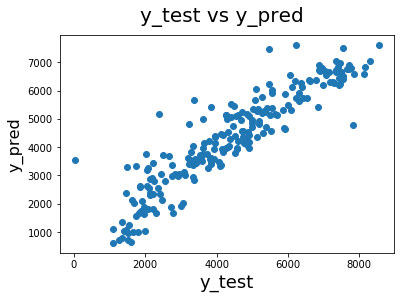

In [70]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

From the above plot, it's evident that the model is doing well on the test set as well.

In [208]:
X.columns

Index(['onehotencoder__season_spring', 'onehotencoder__season_summer',
       'onehotencoder__season_winter', 'onehotencoder__mnth_Mar',
       'onehotencoder__mnth_Nov', 'onehotencoder__mnth_Sept',
       'onehotencoder__weekday_Mon',
       'onehotencoder__weathersit_Clear/Partly Cloudy',
       'onehotencoder__weathersit_Light_snow/Light_rain',
       'onehotencoder__weathersit_Mist', 'onehotencoder__yr_0',
       'onehotencoder__yr_1', 'onehotencoder__workingday_0',
       'onehotencoder__workingday_1', 'remainder__temp', 'remainder__hum',
       'remainder__windspeed'],
      dtype='object')

### 6.3 Training using the sklearn library to get co efficients

In [220]:
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y_train)
# get importance
importance = model.coef_
# summarize feature importance

cdf = pd.DataFrame(model.coef_, X.columns, columns=['Coefficients'])
print(cdf.sort_values(by='Coefficients', ascending=False))


                                                 Coefficients
onehotencoder__weathersit_Clear/Partly Cloudy    3.517805e+16
onehotencoder__weathersit_Mist                   3.517805e+16
onehotencoder__weathersit_Light_snow/Light_rain  3.517805e+16
onehotencoder__workingday_1                      1.447212e+15
onehotencoder__workingday_0                      1.447212e+15
onehotencoder__yr_1                              3.252541e+14
onehotencoder__yr_0                              3.252541e+14
remainder__temp                                  3.853490e+03
onehotencoder__season_winter                     9.690912e+02
onehotencoder__mnth_Sept                         7.434741e+02
onehotencoder__weekday_Mon                       4.724331e+02
onehotencoder__mnth_Mar                          4.438283e+02
onehotencoder__season_summer                     4.099842e+02
onehotencoder__mnth_Nov                         -4.871705e+02
onehotencoder__season_spring                    -9.322529e+02
remainde

As per the above results, The highest co effiecient with weather, workingday and year.

# 7: Summary & Conclusion <a name="6"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

Following are the important conclusion which would be helpful to predict the rides

- The rides seems to be on the higher side on summer and fall season. 
- The ride demand is seems to be consistent on working days and on holiday. 
- The ride sharing is picking the trend and it is observed the demand is increasing year on year.
- The demand of rides are higher on clear day than those days with thunderstom and cloudy weather.
- The top features affecting the rides are weather, working day and year.

# 8: References <a name="6"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

- Pandas - https://pandas.pydata.org/
- Matplotlib - https://matplotlib.org/stable/index.html
- Seaborn - https://seaborn.pydata.org/
- sklearn - https://scikit-learn.org/stable/
- statsmodel - https://www.statsmodels.org/stable/index.html